----
# Laboratorium 3 - Operacje podstawowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy`, `matplotlib` oraz `imageio`.
### 0.2. Umiejętność wyświetlania obrazów, oceny ich jakości subiektywnej (w tym kontrastu). 
### 0.3. Umiejętność interpretacji histogramu dla obrazu. 
### 0.4. Zagadnienia teoretyczne z poprzednich zajęć.

Literatura: 
- K. Sayoo, Kompresja danych - wprowadzenie, Wydawnictwo ReadMe, 2002
- W. Skarbek, Multimedia. Algorytmy i standardy kompresji, Warszawa, PLJ 1998
- R. Tadeusiewicz, Komputerowa analiza i przetwarzanie obrazów
- Ch. D.Watkins, A. Sadun, S. Marenka, Nowoczesne metody przetwarzania obrazu, WNT 1995
- w języku angielskim: R. Fisher, S. Perkins, A. Walker, E. Wolfart, Hypermedia Image Processing Reference - Point Operations
- w języku angielskim: I.T. Young, J.J. Gerbrands, L.J. van Vliet, Image Processing Fundamentals - Histogram-based Operations

----
## UWAGA !!! 
Przy przeprowadzaniu operacji na obrazach należy pamiętać o zachowaniu używanych bibliotek w przypadku przeroczenia zakrtesu liczb reprezentowanych przez dany typ zmiennej (tzw `overflow` i `underflow`). Przy przetwarzaniu obrazów uzywamy arytmetyki `NASYCENIOWEJ`.

In [61]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import imageio

----
## 1. Proste operacje punktowe
----  
Dodanie stałej:  
$$ F[U(i,j)] = U(i,j) + const $$
----  
### Zadanie A:  
Przeprowadź operację dodania stałej. Wyświetl obok siebie obrazy oraz histogramy przed i po przeprowadzeniu operacji punktowej . 

Podpowiedź: `np.clip`

C:\Users\Marcel\AppData\Local\Temp\ipykernel_13320\2964674237.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('boats.png')
C:\Users\Marcel\AppData\Local\Temp\ipykernel_13320\2964674237.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figImg.show()


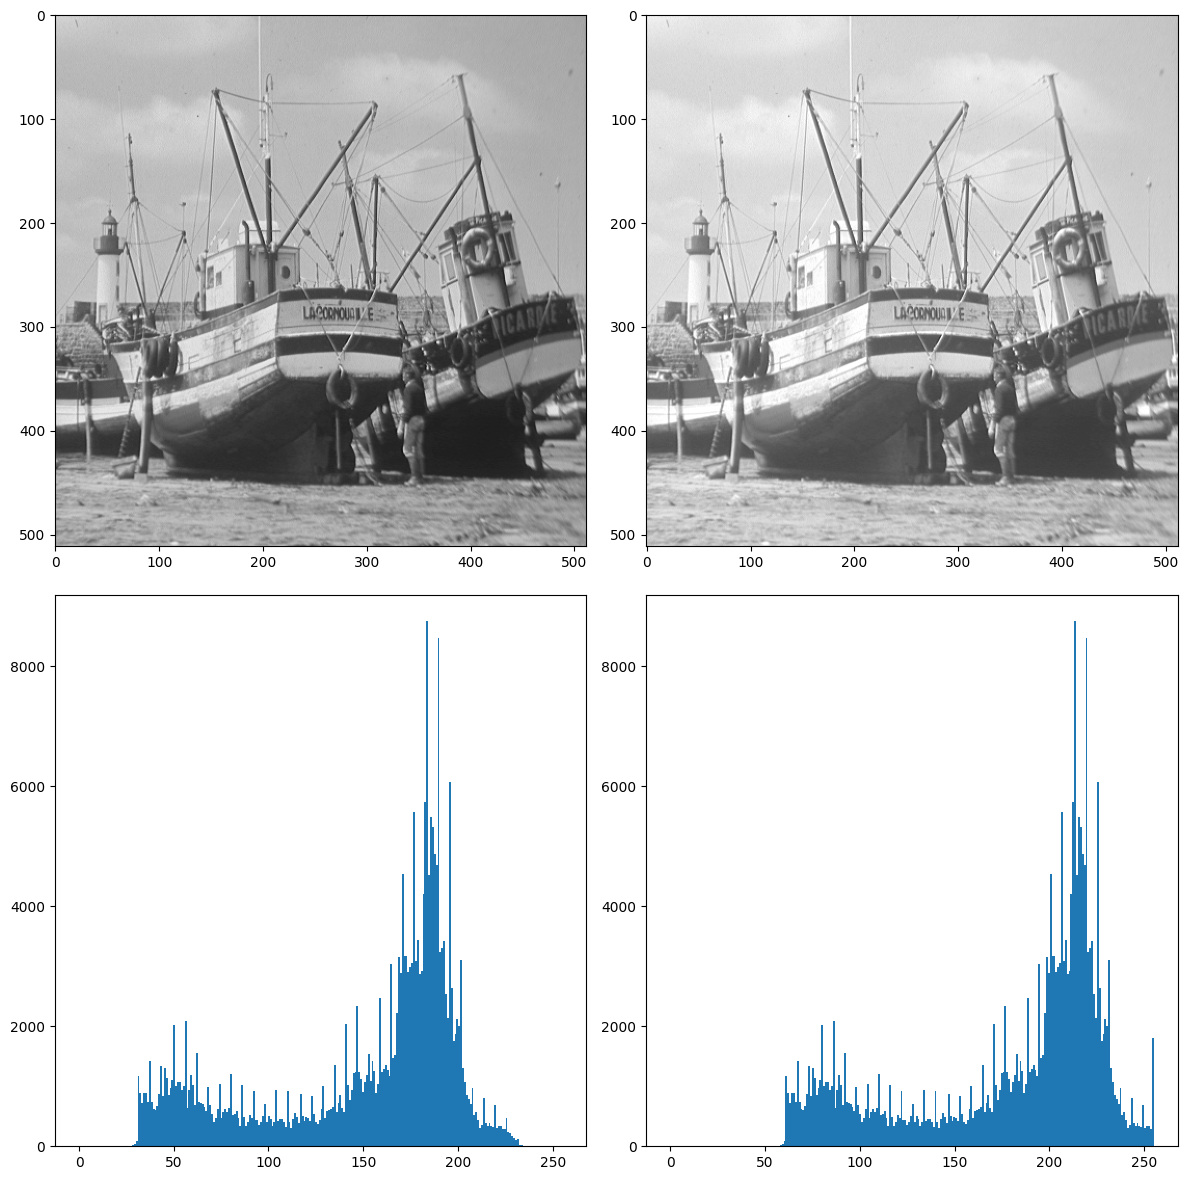

In [62]:
# If we add constat, then the picture will be brighter, in other case darker. 
def addConstant(image,constant):
    #operate in int 32 to avoid wrapping
    image = image.astype(np.int32) # set type of samples
    image = image + constant # add constant to whole values in matrix
    image = np.clip(image, 0, 255) #clip the values that are < 0 or > 255
    #apply saturation
    return image


image = imageio.imread('boats.png')
imageAfter = addConstant(image,30)
figImg, axsImg = plt.subplots(2,2,figsize = [12, 12])
axsImg[0][0].imshow(image     ,cmap=plt.cm.gray, vmin=0, vmax=255)
axsImg[0][1].imshow(imageAfter,cmap=plt.cm.gray, vmin=0, vmax=255)
axsImg[1][0].hist(image     .ravel(), bins=256, range=[0, 255])
axsImg[1][1].hist(imageAfter.ravel(), bins=256, range=[0, 255])
figImg.tight_layout()
figImg.show()

### Zadanie Dodatkowe:  
Zastąp operację dodania stałej dowolną funkcją np. wielomian, logarytm. Pamiętaj że próbki obrazu musza być liczbami całkowitymi z zakresu (0,255). Wyświetl obok siebie obrazy oraz histogramy przed i po przeprowadzeniu operacji punktowej . 

----  
Operacja binaryzacji: 
$$
F[U(i,j)] = \begin{cases}
     0 &  \text{dla: } U(i,j) < T \\
     2^L-1 &  \text{dla: } T < U(i,j) \\  
\end{cases}  \\
\text{gdzie: }  \\
T - \text{ próg binaryzacji.}  \\
L - \text{ liczba bitów reprezentacji próbki }\\
$$
----  
### Zadanie B:  
Przeprowadź operację binaryzacji. Wyświetl obok siebie obrazy oraz histogramy przed i po przeprowadzeniu operacji punktowej. 

Podpowiedź: `np.where`

C:\Users\Marcel\AppData\Local\Temp\ipykernel_13320\4052511978.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('boats.png')
C:\Users\Marcel\AppData\Local\Temp\ipykernel_13320\4052511978.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figImg.show()


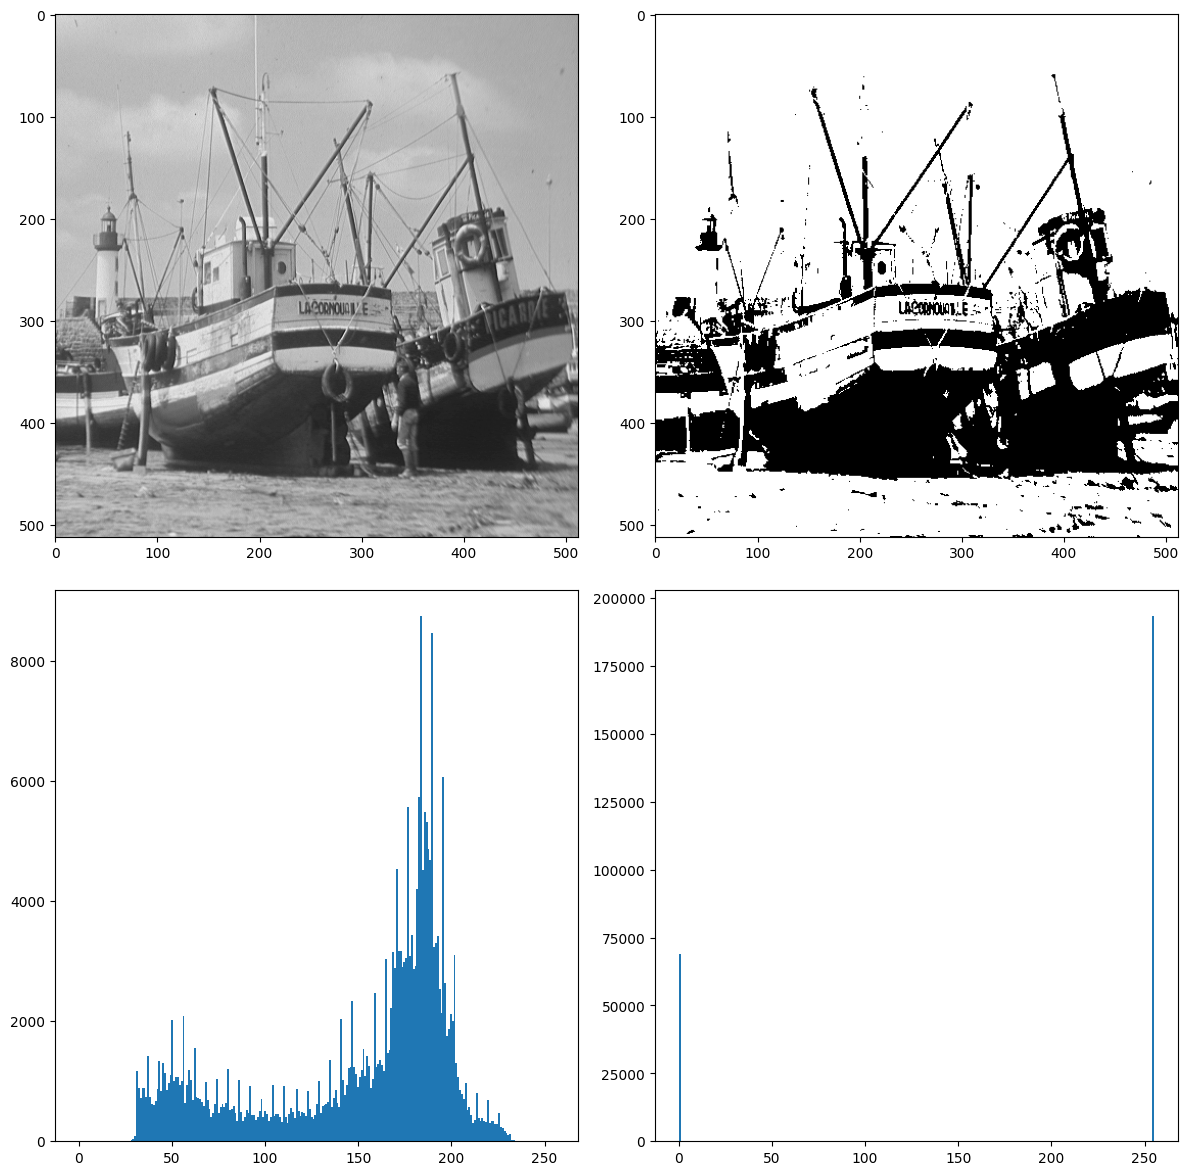

In [63]:
def binarizeImage(image, treshold):
    #binarize image
    image = np.where(image<treshold, 0, 2**8 - 1)
    return image

image = imageio.imread('boats.png')
imageAfter = binarizeImage(image,127)

figImg, axsImg = plt.subplots(2,2,figsize = [12, 12])
axsImg[0][0].imshow(image     ,cmap=plt.cm.gray, vmin=0, vmax=255)
axsImg[0][1].imshow(imageAfter,cmap=plt.cm.gray, vmin=0, vmax=255)
axsImg[1][0].hist(image     .ravel(), bins=256, range=[0, 255])
axsImg[1][1].hist(imageAfter.ravel(), bins=256, range=[0, 255])

figImg.tight_layout()
figImg.show()

----
## 2. Zwiększenie kontrastu obrazu
----
$$ U(i,j) \text{- spróbkowana funkcja reprezentująca obraz} $$
### Operacja normalizacji histogramu: 
$$ max = max(U(i,j))$$
$$ min = min(U(i,j))$$
$$
F[U(i,j)] = {U(i,j) - min \over max - min} * (2^{L}-1) \\
\text{ gdzie: } \\
L - \text{ liczba bitów na których zapisana jest jedna próbka obrazu}
$$
### Operacja wyrównania histogramu: 
1. Wyznacz prawdopodopieństwo wartości występowania próbki o zadanej wartosci $k$ w obrazie:  (ZNORMALIZOWANA WARTOŚĆ Z HISTOGRAMU)  
$$
p(k) = {n_k \over N} , \\
\text{gdzie: } \\
n_k \text{ - ilość próbek o wartości k wysępujących w obrazie;} \\ 
N \text{- liczba wszystkich próbek w obrazie} 
$$ 
2. Wyznacz dystybuantę rozkładu prawdopodobieństwa próbek o wartości k
$$ D(k) = \sum_{l=0}^{k}p(l) $$
3. Wykonaj operację punktową na obrazie według poniższego wzoru: 
$$
F[U(i,j)] = round \bigg( {D[U(i,j)] - min_{nonZero}(D) \over 1 - min_{nonZero}(D)} *(2^{L}-1) \bigg) \\
\text{gdzie: } \\ 
min_{nonZero}(D) - \text{ najmniejsza niezerowa wartosć dystybuanty} \\
$$
----
### Zadanie A:  
Napisz funkcje realizujące operację normalizacji histogramu. Porównaj obrazy przed i po normalizacji oraz ich histogramy. 

In [64]:
def image_histogram_normalization(image):
    max = np.max(image)
    min = np.min(image)
    image = ((image - min)/(max - min))*(2**8 - 1) # operacje dodwania, mnożenia itp. można wykonać od razu na całej macierzy i itak się zropi pole po polu
    return image


### Zadanie B:  
Napisz funkcje realizującą operację wyrównania histogramu. Porównaj obrazy przed i po normalizacji oraz ich histogramy. 

Pomocne funkcje: `np.histogram` (opcja normalizacji), `.cumsum()`, `np.where`, dla alternatywnego sposobu `np.interp`

In [92]:
#wersja z wikipedii (w sensie wzory)
def image_histogram_equalization(image):
    image_histogram, bins = np.histogram(image.ravel(), bins=256, range=[0, 255])
    cumulative_distrib = image_histogram.cumsum()
    first_non_zero_value = np.min(np.where(cumulative_distrib > 0, cumulative_distrib, 300))
    image_eqalized = np.round((cumulative_distrib[image] - first_non_zero_value) / (np.size(image) - first_non_zero_value) * 255)
    return image_eqalized.astype(np.uint8)
                                  


### Zadanie C:  
Porównaj działanie operacji normalizacji histogramu oraz wyrówanania hiostogramu. Uruchom poniższy kod (`image_histogram_normalization` oraz `image_histogram_equalization` to funkcje z zadań A i B) i porównaj histogramy, dystrybuantę oraz kontrast na przetworzonych obrazach. 

C:\Users\Marcel\AppData\Local\Temp\ipykernel_13320\1635686522.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figImg.show()


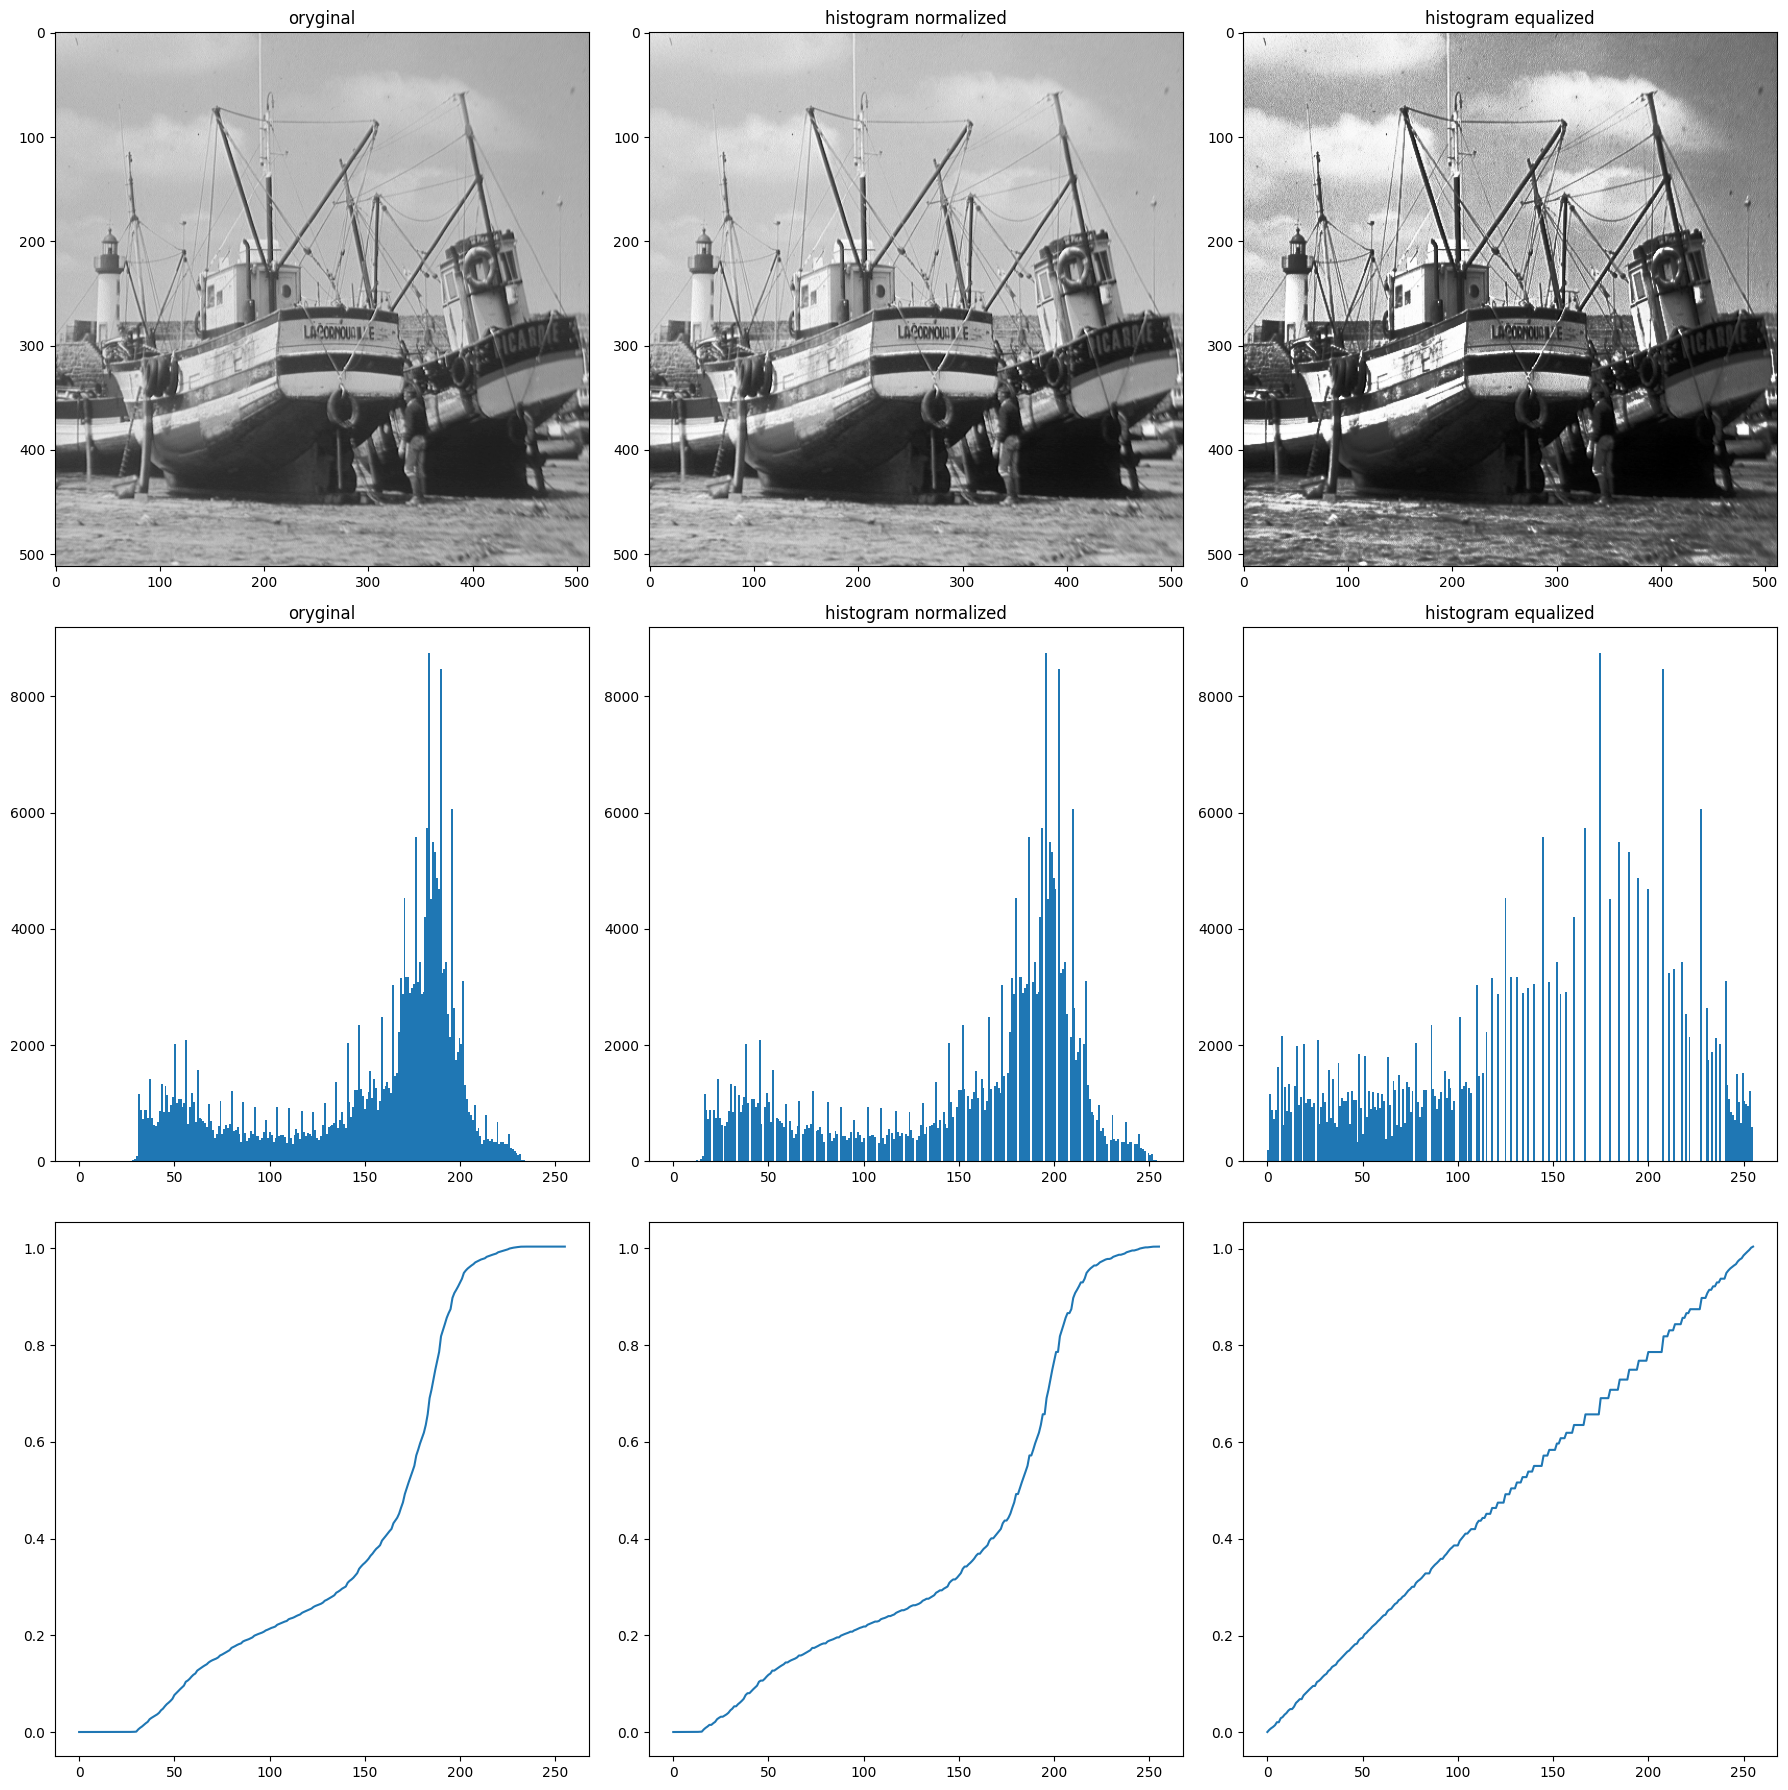

In [93]:
image_norm = image_histogram_normalization(image)
image_hequ = image_histogram_equalization (image)

figImg, axsImg = plt.subplots(3, 3, figsize=[18, 18])
#image
axsImg[0][0].imshow(image     , cmap=plt.cm.gray, vmin=0, vmax=255); axsImg[0][0].set_title("oryginal"  )
axsImg[0][1].imshow(image_norm, cmap=plt.cm.gray, vmin=0, vmax=255); axsImg[0][1].set_title("histogram normalized")
axsImg[0][2].imshow(image_hequ, cmap=plt.cm.gray, vmin=0, vmax=255); axsImg[0][2].set_title("histogram equalized")

#histogram
axsImg[1][0].hist(image.ravel(), bins=256, range=[0, 255]); axsImg[1][0].set_title("oryginal"  )
axsImg[1][1].hist(image_norm.ravel(), bins=256, range=[0, 255]); axsImg[1][1].set_title("histogram normalized")
axsImg[1][2].hist(image_hequ.ravel(), bins=256, range=[0, 255]); axsImg[1][2].set_title("histogram equalized")

#cumulative sum
axsImg[2][0].plot(np.histogram(image     .ravel(), bins=256, range=(0, 255), density=True)[0].cumsum())
axsImg[2][1].plot(np.histogram(image_norm.ravel(), bins=256, range=(0, 255), density=True)[0].cumsum())
axsImg[2][2].plot(np.histogram(image_hequ.ravel(), bins=256, range=(0, 255), density=True)[0].cumsum())

figImg.tight_layout()
figImg.show()

----
## 2. Korekcja Gamma
----
Operacja korekcji gamma: 
$$ \LARGE X' = X^{1 \over y} $$  
----  
Zadanie A  
Napisz funkcję pozwalającą na zastosowanie korekcji gamma na obrazie wejściowym. 

In [ ]:
def apply_gamma(image, gamma=1.0):
    #gamme
    return image

Zadanie B  
Sprawdz działanie korekcji gamma i okreść w jaki sposób zmienia się kontrast obrazu po korekcji w zależności od zastosowanej wartości gamma.

Text(0.5, 1.0, 'gamma curve')

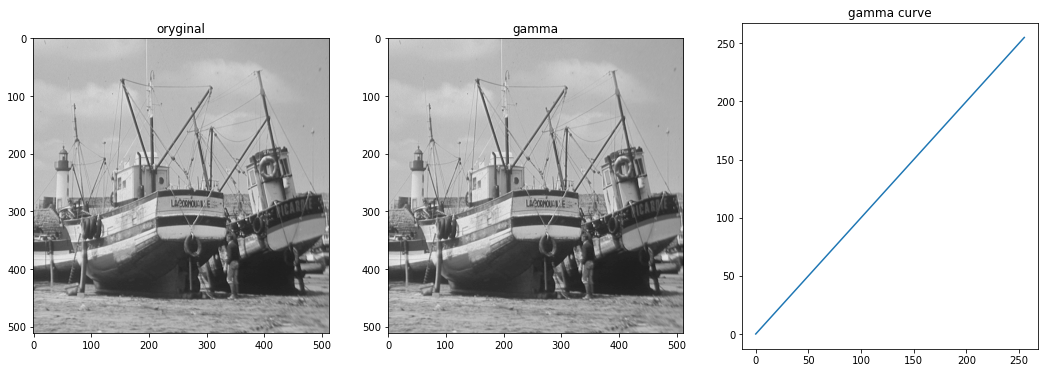

In [ ]:
gamma = 0.5
image_gamma = apply_gamma(image, gamma)
figImg, axsImg = plt.subplots(1, 3, figsize=[18, 6])
axsImg[0].imshow(image      , cmap=plt.cm.gray, vmin=0, vmax=255); axsImg[0].set_title("oryginal")
axsImg[1].imshow(image_gamma, cmap=plt.cm.gray, vmin=0, vmax=255); axsImg[1].set_title("gamma"   )
#gamma function shape
x = 255*np.linspace(0,1,1000)
y = apply_gamma(x,gamma)
axsImg[2].plot(x,y); axsImg[2].set_title("gamma curve")